# Neural Network for MNIST Data Set

#### Classify 10 Different Numbers without TensorFlow
In this NoteBook we will create a nerual network that can classify HandWriten Images in 10 different categories, first we will start by importing the libraries for using MNIST

MNIST is a Data set that is udes specifically for people that start right now with Machine Learning and Neural Network and want to build something without having to worry about data sets regularization of the data and in general the input of the algorithm

This dataset will provide 6000 images all of them with size $[28,28]$ 

## Importing the MNIST DataSet

In [18]:
import mnist
import scipy.misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

The next step is to use *mnist* in order to save in different variables the images and labels of the training and test sets.

In [19]:
train_images = mnist.train_images()/255
train_labels = mnist.train_labels()

test_images = mnist.test_images()/255
test_labels = mnist.test_labels()

In [20]:
print(train_images.shape)
print(test_images.shape)

train_X = train_images
train_X = np.reshape(train_X,[60000, 28, 28,1])
print(train_X.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)


You can show the images just by writing ***plt.imshow*** and then use the specific image with this command line ***train_images[5,:,:]***

Don't forget to show the results just by writing ***plt.show()***

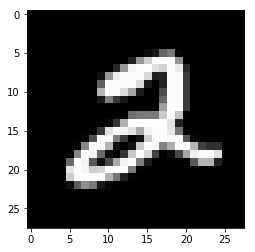

 The number in this image is  2


In [21]:
Index = 5

imgplot = plt.imshow(train_images[Index,:,:], cmap = 'gray')
plt.show()

print(" The number in this image is ", train_labels[Index])

It is really important to transform every image into a vector with $28*28 = 784$ features, this enable as to use this images - pixels as idividuals features that will be used as input in the Nueral Network

## We need to Change Y ( train_labels) from Hot-Vector to Binary representation 

Example of a Hot Vector:
$$Y = [0,2,1,3]$$
Example of the Binary representation
$$ Y = 
\begin{bmatrix}
    1&0&0&0\\
    0&0&1&0\\
    0&1&0&0\\
    0&0&0&1\\
  \end{bmatrix} $$

In [22]:
def HotVector(targets,n_labels):
    Ytr = np.zeros((targets.shape[0], n_labels)) #empty one-hot matrix
    Ytr[np.arange(targets.shape[0]), targets] = 1 #set target idx to 1

    Ytr=np.transpose(Ytr)

    #print(Ytr[:,0:5]) # We will show only the first 5 results

    #print(Ytr.shape)
    return Ytr

In [23]:
n_labels = 10 # How many labels we have (10 different numbers)


targets = train_labels
print(targets[0:5]) # We will show only the first 5 results
print(targets.shape)
Ytr = HotVector(targets,n_labels).T

print(Ytr[0:5]) # We will show only the first 5 results
print(Ytr.shape)

train_y = Ytr

[5 0 4 1 9]
(60000,)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
(60000, 10)


In [24]:
import tensorflow as tf

In [25]:
x = tf.placeholder("float",[None,28,28,1])
y = tf.placeholder("float",[None,10])

In [26]:
def Conv(x,W,b):
    st=1
    temp = tf.nn.conv2d(x,W,strides = [1,st,st,1],padding='SAME')
    z = tf.nn.bias_add(temp,b)
    z = tf.nn.relu(z)
    
    return z

In [27]:
def maxPool(x,k=2):
    return tf.nn.max_pool(x,ksize=[1,k,k,1],strides=[1,k,k,1],padding='SAME')

In [28]:
wc1 = tf.get_variable('wc1', shape = (3,3,1,32), initializer=tf.contrib.layers.xavier_initializer() )
# The same dimensions from the Convolution 
# The MaxPooling will devide it by 2 so (14,14,32)
wc2 = tf.get_variable('wc2', shape = (3,3,32,64), initializer=tf.contrib.layers.xavier_initializer() )
# The same dimensions from the Convolution 
# The MaxPooling will devide it by 2 so (7,7,64)
wd1 = tf.get_variable('wd1', shape = (7*7*64,128), initializer=tf.contrib.layers.xavier_initializer() )
out = tf.get_variable('out', shape = (128,10), initializer=tf.contrib.layers.xavier_initializer() )

bc1 = tf.get_variable('bc1', shape = (32), initializer=tf.contrib.layers.xavier_initializer() )

bc2 = tf.get_variable('bc2', shape = (64), initializer=tf.contrib.layers.xavier_initializer() )

bd1 = tf.get_variable('bd1', shape = (128), initializer=tf.contrib.layers.xavier_initializer() )
bOut = tf.get_variable('bOut', shape = (10), initializer=tf.contrib.layers.xavier_initializer() )

ValueError: Variable wc1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\milto\Anaconda3\envs\tensorflow-sessions\lib\site-packages\tensorflow\python\framework\ops.py", line 1740, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access
  File "C:\Users\milto\Anaconda3\envs\tensorflow-sessions\lib\site-packages\tensorflow\python\framework\ops.py", line 3414, in create_op
    op_def=op_def)
  File "C:\Users\milto\Anaconda3\envs\tensorflow-sessions\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)


In [29]:
conv1 = Conv(x,wc1,bc1)
conv1 = maxPool(conv1, k=2)

conv2 = Conv(conv1,wc2,bc2)
conv2 = maxPool(conv2, k=2)

fc1 = tf.reshape(conv2,[-1,wd1.shape[0]])

fc1 = tf.add(tf.matmul(fc1,wd1),bd1)

fc1 = tf.nn.relu(fc1)


Res = tf.add(tf.matmul(fc1,out),bOut)

In [30]:
#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(Res, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [31]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Res,labels=y))

optimizer = tf.train.AdadeltaOptimizer(learning_rate=0.1).minimize(cost)

In [32]:
init = tf.global_variables_initializer()

In [35]:
batch = 100;
BaNow=0;

sess = tf.Session()

sess.run(init)
    
for i in range(1000):
        
    print(i)
        
    batch_x = train_X[BaNow:BaNow+batch,:,:,:]
    batch_y = train_y[BaNow:BaNow+batch,:]
    #print(batch_x.shape)
    #print(batch_x.shape)
        
    opt = sess.run(optimizer, feed_dict = {x: batch_x, y: batch_y})
        
        
    oss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,y: batch_y})
        
    print(oss)
    print(acc)
        
        
    #print(opt)
        
    BaNow=BaNow+batch
    if (BaNow>60000):
        BaNow=0
            
            
            

0
2.3726904
0.09
1
2.3012109
0.14
2
2.381131
0.08
3
2.2780285
0.14
4
2.337271
0.1
5
2.325797
0.12
6
2.3394618
0.12
7
2.3508272
0.05
8
2.3161764
0.12
9
2.3367383
0.06
10
2.328731
0.1
11
2.2836616
0.1
12
2.313448
0.09
13
2.2987516
0.1
14
2.3350658
0.07
15
2.303385
0.11
16
2.2897515
0.13
17
2.296966
0.16
18
2.2878225
0.14
19
2.2976522
0.18
20
2.3145304
0.11
21
2.3221824
0.06
22
2.297377
0.1
23
2.2929654
0.13
24
2.2956274
0.09
25
2.3076172
0.09
26
2.2920485
0.1
27
2.2689526
0.11
28
2.261483
0.16
29
2.31323
0.06
30
2.2876441
0.08
31
2.2784343
0.14
32
2.29109
0.06
33
2.2494607
0.16
34
2.3025231
0.04
35
2.2895517
0.09
36
2.2981756
0.1
37
2.261416
0.09
38
2.275609
0.12
39
2.259958
0.1
40
2.2705474
0.13
41
2.2844253
0.1
42
2.2797823
0.08
43
2.2732892
0.1
44
2.2712948
0.14
45
2.2656596
0.09
46
2.2745674
0.12
47
2.2775233
0.1
48
2.2653718
0.09
49
2.259663
0.14
50
2.2778356
0.13
51
2.2596865
0.2
52
2.258357
0.13
53
2.2628412
0.11
54
2.266232
0.1
55
2.258265
0.22
56
2.2746937
0.19
57
2.244068
0.26


KeyboardInterrupt: 

[-2.368896  -4.4852633 -2.0088089 -0.5954398  5.1401796 -1.9371145
 -1.6949599  1.3181331 -0.9928811  1.3732127]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
4
4


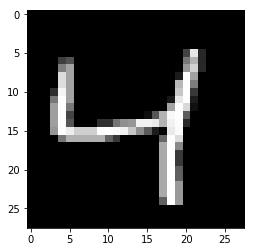

In [48]:
batch = 100;
BaNow=0;
batch_x = train_X[BaNow:BaNow+batch,:,:,:]
batch_y = train_y[BaNow:BaNow+batch,:]

Ytt = sess.run(Res,feed_dict={x: batch_x,y: batch_y})

idx=2
print(Ytt[idx,:])
#print(sum(Ytt[idx,:])) # Because A2 is the propability to be something and the sumation of this propabilities is equal to 1
print(batch_y[idx,:])

print(np.argmax(Ytt[idx,:]))
print(np.argmax(batch_y[idx,:]))
imgplot = plt.imshow(train_images[idx,:,:], cmap = 'gray')
plt.show()